In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

import os
import sys
__file__ = './'
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))

# os.path.dirname(__file__)获取当前文件的绝对路径
# os.path.join(xx,'..')在后面追加..，相当于进入上一级目录
# os.path.abspath(xx)获取绝对路径
# sys.path.append()将其加入系统路径当中

import MSA
import LINK

In [2]:
# read data
my_link = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='link_info')
my_link['I'] = 0
my_node = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='node_info')
my_link['name'] = my_link['from'].astype('str') +'-'+ my_link['to'].astype('str')
my_demand = pd.read_excel(r'D:\004_PhD_Dissertation\Paper_Code\Part3\input_network\small_net.xlsx', sheet_name='demand_info')
print(my_demand)

# set parameter
origin_zone = ['r1']
destination_zone = ['s1']
theta_1 = 1# path
theta_2 = 0.5 # mode
miu_in = 25
miu_out = 30
lamda_0_hailing = 2 #2 RMB/minute
lamda_0_PR = 20 # RMB
lamda_0_transit = 5
N_hailing = 500
lamda_0_auto = LINK.compute_lamda_0_auto(fuel_consumption=8.5)

fee_rate =np.arange(0.2, 5.1, 0.2)
df = []
for lamda_0_hailing in fee_rate:
    result = MSA.assignment(my_link= my_link, my_node= my_node, my_demand= my_demand,
                        origin_zone= origin_zone, destination_zone= destination_zone,
                        miu_in= miu_in, miu_out= miu_out,
                        lamda_0_auto= lamda_0_auto,
                        lamda_0_hailing= lamda_0_hailing,
                        lamda_0_transit= lamda_0_transit,
                        lamda_0_PR= lamda_0_PR,
                        theta_1= theta_1, theta_2= theta_2,
                        N_hailing= N_hailing, A=2, maximum_iter=300)
    df.append(result)

# path_flow
path_1_flow = [df[i][2].tail(4).iloc[0]['path_flow'] for i in range(len(df))]
path_2_flow = [df[i][2].tail(4).iloc[1]['path_flow'] for i in range(len(df))]
path_3_flow = [df[i][2].tail(4).iloc[2]['path_flow'] for i in range(len(df))]
path_4_flow = [df[i][2].tail(4).iloc[3]['path_flow'] for i in range(len(df))]

# path_duration
path_1_duration = [df[i][2].tail(4).iloc[0]['path_duration'] for i in range(len(df))]
path_2_duration = [df[i][2].tail(4).iloc[1]['path_duration'] for i in range(len(df))]
path_3_duration = [df[i][2].tail(4).iloc[2]['path_duration'] for i in range(len(df))]
path_4_duration = [df[i][2].tail(4).iloc[3]['path_duration'] for i in range(len(df))]

# path_cost
path_1_cost = [abs(df[i][2].tail(4).iloc[0]['path_cost']) for i in range(len(df))]
path_2_cost = [abs(df[i][2].tail(4).iloc[1]['path_cost']) for i in range(len(df))]
path_3_cost = [abs(df[i][2].tail(4).iloc[2]['path_cost']) for i in range(len(df))]
path_4_cost = [abs(df[i][2].tail(4).iloc[3]['path_cost']) for i in range(len(df))]

# convert to dataframe
dfx = pd.DataFrame({
        'fare_rate': fee_rate,
        'path_1_flow': path_1_flow,
        'path_2_flow': path_2_flow,
        'path_3_flow': path_3_flow,
        'path_4_flow': path_4_flow,
        'path_1_cost': path_1_cost,
        'path_2_cost': path_2_cost,
        'path_3_cost': path_3_cost,
        'path_4_cost': path_4_cost,
        'path_1_duration': path_1_duration,
        'path_2_duration': path_2_duration,
        'path_3_duration': path_3_duration,
        'path_4_duration': path_4_duration,})

dfx['total_cost'] = dfx['path_1_flow'] * dfx['path_1_cost'] + dfx['path_2_flow'] * dfx['path_2_cost'] + dfx['path_3_flow'] * dfx['path_3_cost'] + dfx['path_4_flow'] * dfx['path_4_cost']

  OD_pair  demand
0   r1-s1    1000
0.6517
['path-1', 'path-2', 'path-3', 'path-4']
['auto', 'P&R', 'transit', 'R&T']
Iteration = 1, gap = 1.3403711843802788,
the number of idle_hailing:500.0
Iteration = 2, gap = 11.01845101958782,
the number of idle_hailing:401.71271800636646
Iteration = 3, gap = 4.995525018112943,
the number of idle_hailing:398.64537622382977
Iteration = 4, gap = 3.1946938087116554,
the number of idle_hailing:398.2392637087225
Iteration = 5, gap = 2.3338474107421785,
the number of idle_hailing:398.04273181925646
Iteration = 6, gap = 1.8316943218001431,
the number of idle_hailing:397.91653043286345
Iteration = 7, gap = 1.5037191800078704,
the number of idle_hailing:397.82826994977904
Iteration = 8, gap = 1.2731822790362266,
the number of idle_hailing:397.7631579037594
Iteration = 9, gap = 1.1025396458426941,
the number of idle_hailing:397.7132045729802
Iteration = 10, gap = 0.9712858389411482,
the number of idle_hailing:397.67370774791374
Iteration = 11, gap = 0.86728

In [3]:
dfx

,fare_rate,path_1_flow,path_2_flow,path_3_flow,path_4_flow,path_1_cost,path_2_cost,path_3_cost,path_4_cost,path_1_duration,path_2_duration,path_3_duration,path_4_duration,total_cost
0,0.2,245.786279,236.095493,258.618137,259.500091,102.504458,137.279855,68.393093,66.370094,33.406848,123.539706,144.857708,119.998899,92516.084038
1,0.4,246.059066,236.351634,258.992249,258.597051,102.685884,137.394081,68.375453,69.347792,33.465975,123.534377,144.815372,119.945880,93381.954775
2,0.6,246.330183,236.641882,259.350186,257.677749,102.875927,137.517270,68.357818,72.325613,33.527912,123.532416,144.773050,119.893164,94249.105616
3,0.8,246.595210,236.925713,259.700435,256.778642,103.062361,137.638220,68.340607,75.303948,33.588672,123.530706,144.731742,119.841670,95109.248895
4,1.0,246.854268,237.203241,260.043083,255.899408,103.245226,137.756949,68.323808,78.282787,33.648269,123.529231,144.691425,119.791372,95962.571926
5,1.2,247.107453,237.474563,260.378237,255.039747,103.424548,137.873469,68.307414,81.262120,33.706711,123.527980,144.652078,119.742248,96809.252733
6,1.4,247.354861,237.739777,260.706005,254.199357,103.600356,137.987791,68.291416,84.241938,33.764008,123.526937,144.613684,119.694278,97649.466958
7,1.6,247.596589,237.998978,261.026499,253.377934,103.772679,138.099930,68.275808,87.222233,33.820169,123.526091,144.576224,119.647441,98483.387791
8,1.8,247.832732,238.252265,261.339826,252.575177,103.941550,138.209901,68.260580,90.202995,33.875205,123.525430,144.539678,119.601716,99311.185917
9,2.0,248.063387,238.499735,261.646099,251.790779,104.107001,138.317719,68.245727,93.184217,33.929127,123.524943,144.504030,119.557083,100133.029458


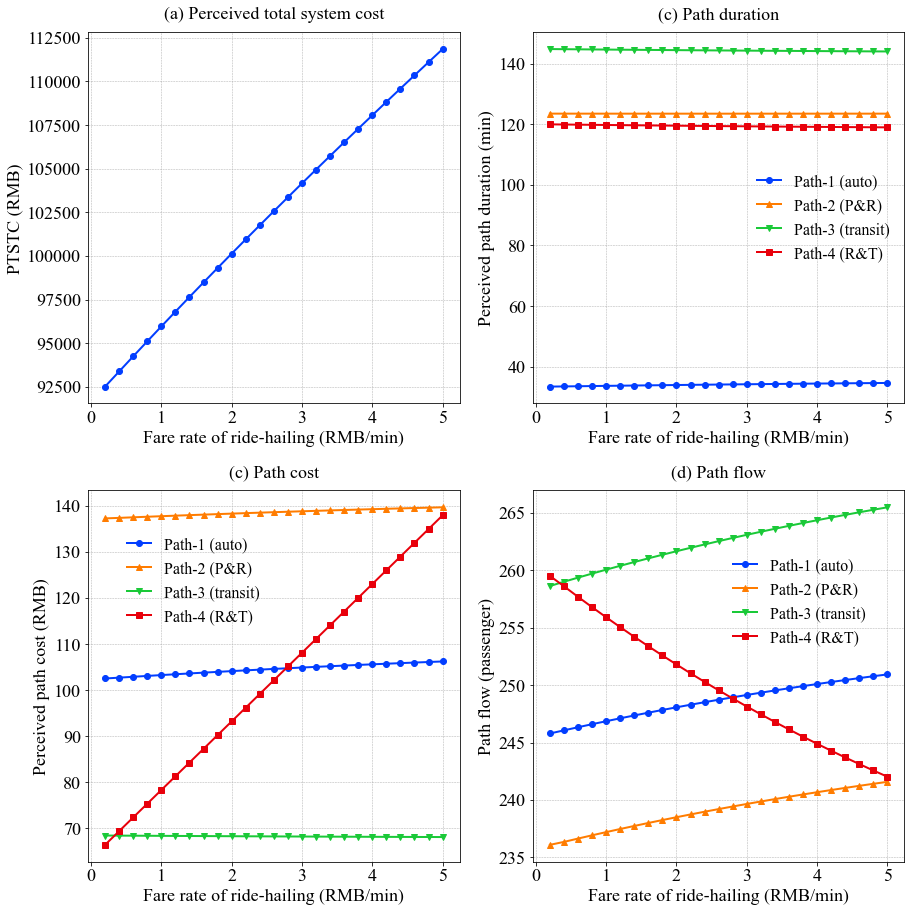

In [4]:
import seaborn as sns
sns.set_palette("bright", 10)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18

fig = plt.figure(figsize=(13,13))

ax = plt.subplot(2,2,1)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['fare_rate'], dfx['total_cost'], '-', lw=2, marker='o')
ax.set_xlabel('Fare rate of ride-hailing (RMB/min)')
ax.set_ylabel('PTSTC (RMB)')
ax.set_title('(a) Perceived total system cost', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,2)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['fare_rate'], dfx['path_1_duration'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['fare_rate'], dfx['path_2_duration'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['fare_rate'], dfx['path_3_duration'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['fare_rate'], dfx['path_4_duration'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Fare rate of ride-hailing (RMB/min)')
ax.set_ylabel('Perceived path duration (min)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5) #,bbox_to_anchor = (1,0.6)
ax.set_title('(c) Path duration', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,3)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['fare_rate'], dfx['path_1_cost'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['fare_rate'], dfx['path_2_cost'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['fare_rate'], dfx['path_3_cost'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['fare_rate'], dfx['path_4_cost'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Fare rate of ride-hailing (RMB/min)')
ax.set_ylabel('Perceived path cost (RMB)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5,bbox_to_anchor = (0.5,0.6)) #,bbox_to_anchor = (0.6,0.4)
ax.set_title('(c) Path cost', fontsize=18, loc='center', y=1.02)

ax = plt.subplot(2,2,4)
ax.grid(ls = '--', lw = 0.5, zorder = 0)
ax.plot(dfx['fare_rate'], dfx['path_1_flow'], '-', lw=2, marker='o',label='Path-1 (auto)')
ax.plot(dfx['fare_rate'], dfx['path_2_flow'], '-', lw=2, marker='^',label='Path-2 (P&R)')
ax.plot(dfx['fare_rate'], dfx['path_3_flow'], '-', lw=2, marker='v',label='Path-3 (transit)')
ax.plot(dfx['fare_rate'], dfx['path_4_flow'], '-', lw=2, marker='s',label='Path-4 (R&T)')
ax.set_xlabel('Fare rate of ride-hailing (RMB/min)')
ax.set_ylabel('Path flow (passenger)')
ax.legend(loc='best', fontsize=16, frameon=False, handlelength=1.5, bbox_to_anchor = (0.5,0.7),)  
ax.set_title('(d) Path flow', fontsize=18, loc='center', y=1.02)

plt.tight_layout()
plt.show()


In [9]:
dfx.iloc[:,1:5].sum(axis=1)

0     1000.0
1     1000.0
2     1000.0
3     1000.0
4     1000.0
5     1000.0
6     1000.0
7     1000.0
8     1000.0
9     1000.0
10    1000.0
11    1000.0
12    1000.0
13    1000.0
14    1000.0
15    1000.0
16    1000.0
17    1000.0
18    1000.0
19    1000.0
20    1000.0
21    1000.0
22    1000.0
23    1000.0
24    1000.0
dtype: float64